In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib.ticker as mticker
import matplotlib.dates as md
import datetime
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
from math import pi
import matplotlib as mpl
from matplotlib import cm
from pandas.core.dtypes.generic import ABCSeries

In [21]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":20})  
sns.set(font_scale=3)
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
sns.set_style('ticks')
sns.set_palette(palette='Dark2')

In [22]:
# Loading the complete dataframe
infile = open('../data/daily_fitbit_sema_df_unprocessed.pkl','rb')
df = pickle.load(infile)
infile.close()
#df

In [23]:
df.reset_index(inplace=True)
users=df['id']
dates=df['date']
dates=pd.to_datetime(dates, format='%Y-%m-%d', errors='ignore')

In [24]:
df_sema_mood = pd.concat([users, dates,df['RESTED/RELAXED'],df['TIRED'], df['TENSE/ANXIOUS'], 
                          df['NEUTRAL'],df['ALERT'],df['SAD'],df['HAPPY']],axis=1)
df_sema_mood = df_sema_mood.dropna()
df_sema_mood = df_sema_mood.sort_values(by='date', ascending=True)
df_sema_mood = df_sema_mood.groupby(by="date").sum()
df_sema_mood.reset_index(inplace=True)
df_sema_mood['Dates'] = pd.to_datetime(df_sema_mood['date']).dt.date
df_sema_mood['Time'] = pd.to_datetime(df_sema_mood['date']).dt.time
df_sema_mood['DayName'] = pd.Series(df_sema_mood['date'].dt.day_name(), index=df_sema_mood.index) 
df_sema_mood['DayDate'] = df_sema_mood[['DayName', 'Dates']].apply(lambda x: ','.join(x.fillna('').map(str)), axis=1)
df_sema_mood['DayDate'] = df_sema_mood['DayDate'].str.strip(',')
df_sema_mood

,date,RESTED/RELAXED,TIRED,TENSE/ANXIOUS,NEUTRAL,ALERT,SAD,HAPPY,Dates,Time,DayName,DayDate
0,2021-04-22,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2021-04-22,00:00:00,Thursday,"Thursday,2021-04-22"
1,2021-04-23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2021-04-23,00:00:00,Friday,"Friday,2021-04-23"
2,2021-04-24,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2021-04-24,00:00:00,Saturday,"Saturday,2021-04-24"
3,2021-04-25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2021-04-25,00:00:00,Sunday,"Sunday,2021-04-25"
4,2021-04-26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2021-04-26,00:00:00,Monday,"Monday,2021-04-26"
...,...,...,...,...,...,...,...,...,...,...,...,...
152,2022-01-13,3.0,6.0,7.0,7.0,1.0,0.0,1.0,2022-01-13,00:00:00,Thursday,"Thursday,2022-01-13"
153,2022-01-14,2.0,7.0,2.0,7.0,1.0,0.0,1.0,2022-01-14,00:00:00,Friday,"Friday,2022-01-14"
154,2022-01-15,2.0,5.0,2.0,5.0,1.0,2.0,4.0,2022-01-15,00:00:00,Saturday,"Saturday,2022-01-15"
155,2022-01-16,4.0,2.0,3.0,5.0,1.0,1.0,2.0,2022-01-16,00:00:00,Sunday,"Sunday,2022-01-16"


In [25]:
df_sema_mood.reset_index(inplace=True)
df_sema_mood_round1 = (df_sema_mood['date'] >= "2021-05-24") & (df_sema_mood['date'] <= "2021-07-26")
df_sema_mood_round1=df_sema_mood.loc[df_sema_mood_round1]
df_sema_mood_round1

,index,date,RESTED/RELAXED,TIRED,TENSE/ANXIOUS,NEUTRAL,ALERT,SAD,HAPPY,Dates,Time,DayName,DayDate
29,29,2021-05-24,4.0,3.0,2.0,0.0,0.0,1.0,1.0,2021-05-24,00:00:00,Monday,"Monday,2021-05-24"
30,30,2021-05-25,11.0,12.0,9.0,0.0,5.0,3.0,7.0,2021-05-25,00:00:00,Tuesday,"Tuesday,2021-05-25"
31,31,2021-05-26,11.0,14.0,5.0,0.0,5.0,1.0,8.0,2021-05-26,00:00:00,Wednesday,"Wednesday,2021-05-26"
32,32,2021-05-27,10.0,12.0,5.0,0.0,7.0,5.0,5.0,2021-05-27,00:00:00,Thursday,"Thursday,2021-05-27"
33,33,2021-05-28,11.0,11.0,6.0,0.0,7.0,1.0,9.0,2021-05-28,00:00:00,Friday,"Friday,2021-05-28"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,88,2021-07-22,7.0,5.0,3.0,5.0,0.0,2.0,3.0,2021-07-22,00:00:00,Thursday,"Thursday,2021-07-22"
89,89,2021-07-23,2.0,8.0,5.0,3.0,4.0,0.0,1.0,2021-07-23,00:00:00,Friday,"Friday,2021-07-23"
90,90,2021-07-24,5.0,3.0,2.0,2.0,0.0,0.0,6.0,2021-07-24,00:00:00,Saturday,"Saturday,2021-07-24"
91,91,2021-07-25,8.0,5.0,1.0,2.0,0.0,0.0,2.0,2021-07-25,00:00:00,Sunday,"Sunday,2021-07-25"


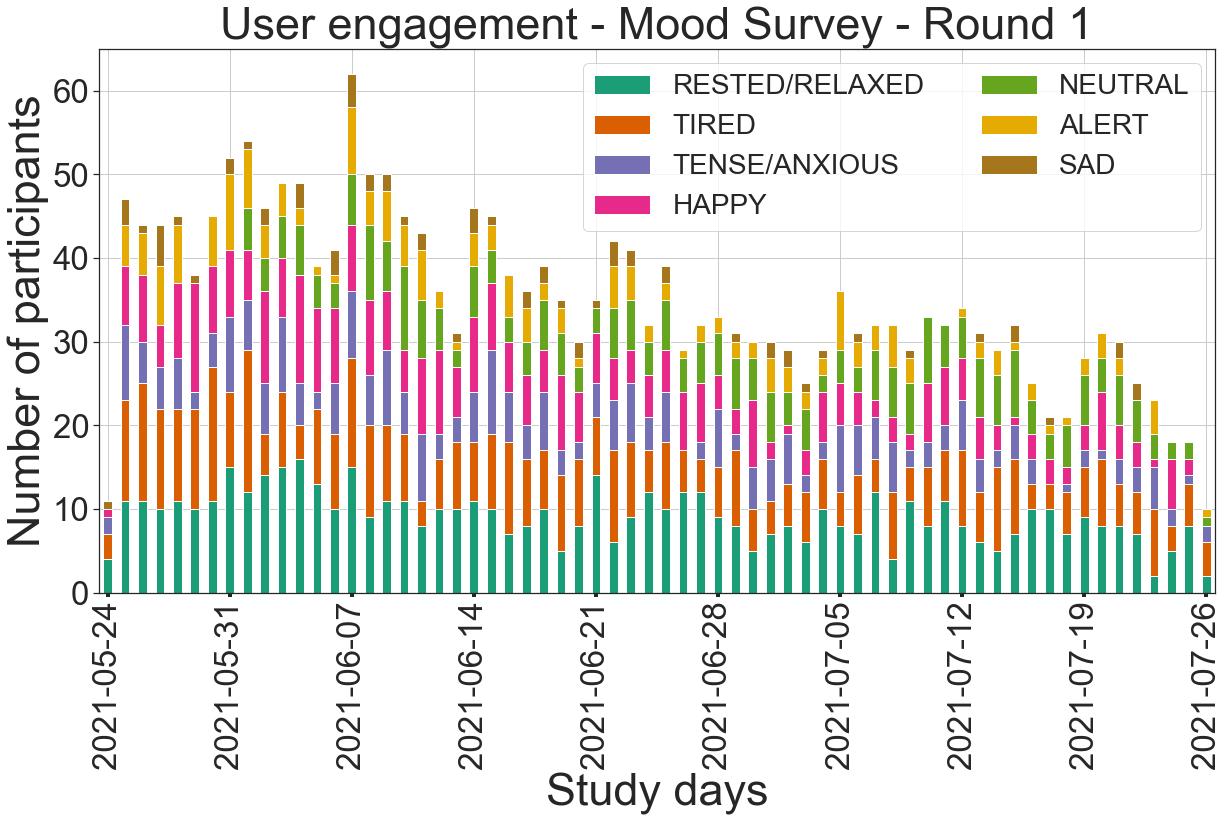

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
df_sema_mood_round1.reset_index().plot(x="Dates", y=["RESTED/RELAXED", "TIRED", "TENSE/ANXIOUS","HAPPY",
                                                       "NEUTRAL","ALERT","SAD"], kind="bar",ax=ax, stacked=True)
plt.xlabel('Study days', fontsize=45)
plt.ylabel('Number of participants', fontsize=45)
plt.title('User engagement - Mood Survey - Round 1', fontsize=45)
#plt.xlim(0,64)
plt.legend(loc='best', ncol=2, fontsize=28)
plt.grid()
plt.ylim(0, 65)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.locator_params(axis='x', nbins=10)
plt.show()

In [27]:
#df_sema_mood.reset_index(inplace=True)
df_sema_mood_round2 = (df_sema_mood['date'] >= "2021-11-15") & (df_sema_mood['date'] <= "2022-01-17")
df_sema_mood_round2=df_sema_mood.loc[df_sema_mood_round2]
df_sema_mood_round2

,index,date,RESTED/RELAXED,TIRED,TENSE/ANXIOUS,NEUTRAL,ALERT,SAD,HAPPY,Dates,Time,DayName,DayDate
93,93,2021-11-15,6.0,3.0,2.0,1.0,0.0,0.0,1.0,2021-11-15,00:00:00,Monday,"Monday,2021-11-15"
94,94,2021-11-16,8.0,9.0,3.0,4.0,3.0,1.0,1.0,2021-11-16,00:00:00,Tuesday,"Tuesday,2021-11-16"
95,95,2021-11-17,5.0,10.0,3.0,7.0,4.0,2.0,6.0,2021-11-17,00:00:00,Wednesday,"Wednesday,2021-11-17"
96,96,2021-11-18,4.0,8.0,5.0,6.0,3.0,1.0,5.0,2021-11-18,00:00:00,Thursday,"Thursday,2021-11-18"
97,97,2021-11-19,7.0,8.0,4.0,4.0,3.0,0.0,5.0,2021-11-19,00:00:00,Friday,"Friday,2021-11-19"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,152,2022-01-13,3.0,6.0,7.0,7.0,1.0,0.0,1.0,2022-01-13,00:00:00,Thursday,"Thursday,2022-01-13"
153,153,2022-01-14,2.0,7.0,2.0,7.0,1.0,0.0,1.0,2022-01-14,00:00:00,Friday,"Friday,2022-01-14"
154,154,2022-01-15,2.0,5.0,2.0,5.0,1.0,2.0,4.0,2022-01-15,00:00:00,Saturday,"Saturday,2022-01-15"
155,155,2022-01-16,4.0,2.0,3.0,5.0,1.0,1.0,2.0,2022-01-16,00:00:00,Sunday,"Sunday,2022-01-16"


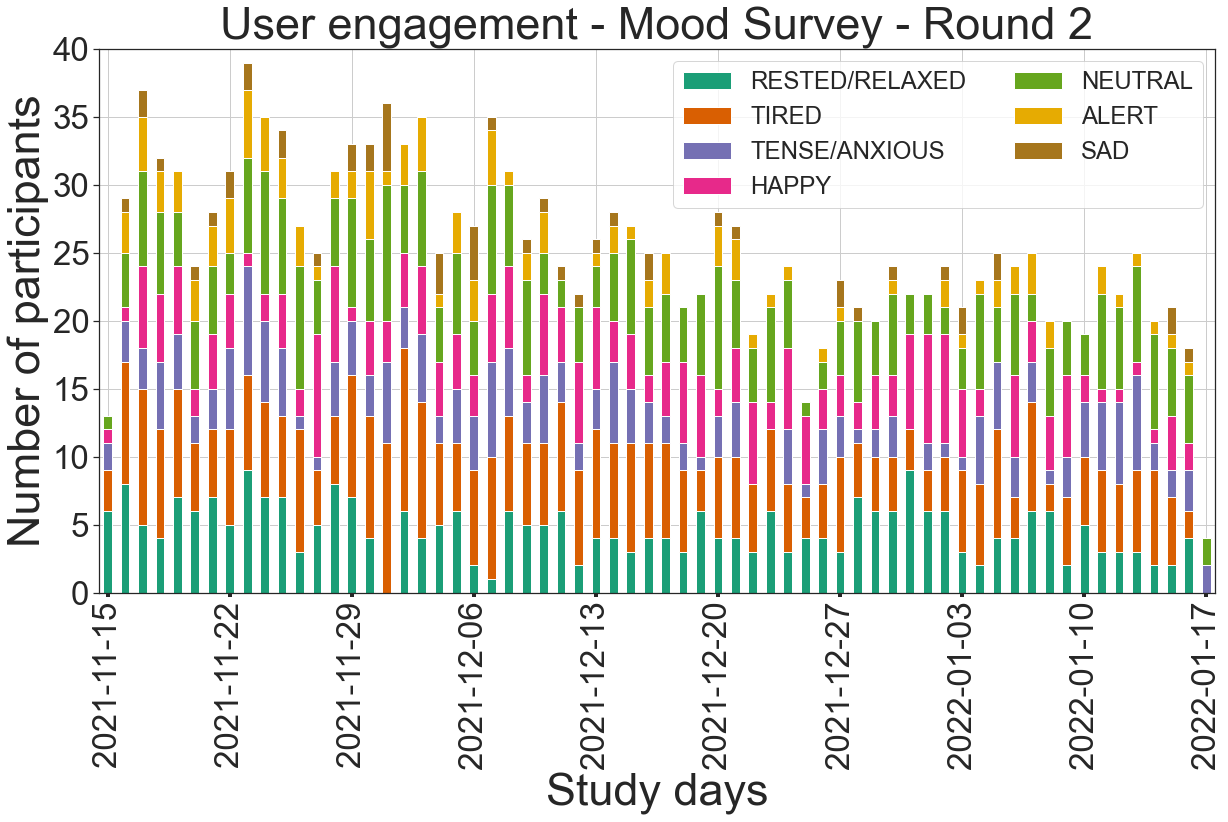

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
df_sema_mood_round2.reset_index().plot(x="Dates", y=["RESTED/RELAXED", "TIRED", "TENSE/ANXIOUS","HAPPY",
                                                       "NEUTRAL","ALERT","SAD"], kind="bar",ax=ax, stacked=True)
plt.xlabel('Study days', fontsize=45)
plt.ylabel('Number of participants', fontsize=45)
plt.title('User engagement - Mood Survey - Round 2', fontsize=45)
#plt.xlim(0,64)
plt.legend(loc='best', ncol=2, fontsize=24)
plt.grid()
plt.ylim(0, 40)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.locator_params(axis='x', nbins=10)
plt.show()

In [29]:
df_sema_place = pd.concat([users, dates, df['ENTERTAINMENT'], df['GYM'],df['HOME_OFFICE'],df['OTHER'],
                          df['OUTDOORS'],df['HOME'],df['WORK/SCHOOL'], df['TRANSIT']],axis=1)
df_sema_place = df_sema_place.dropna()
df_sema_place = df_sema_place.sort_values(by='date', ascending=True)
df_sema_place = df_sema_place.groupby(by="date").sum()
#df_sema_place=df_sema_place.resample('D', on='date').sum()
df_sema_place.reset_index(inplace=True)
df_sema_place['Dates'] = pd.to_datetime(df_sema_place['date']).dt.date
df_sema_place['Time'] = pd.to_datetime(df_sema_place['date']).dt.time
df_sema_place['DayName'] = pd.Series(df_sema_place['date'].dt.day_name(), index=df_sema_place.index) 
df_sema_place['DayDate'] = df_sema_place[['DayName', 'Dates']].apply(lambda x: ','.join(x.fillna('').map(str)), axis=1)
df_sema_place['DayDate'] = df_sema_place['DayDate'].str.strip(',')
df_sema_place

,date,ENTERTAINMENT,GYM,HOME_OFFICE,OTHER,OUTDOORS,HOME,WORK/SCHOOL,TRANSIT,Dates,Time,DayName,DayDate
0,2021-04-22,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-04-22,00:00:00,Thursday,"Thursday,2021-04-22"
1,2021-04-23,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-04-23,00:00:00,Friday,"Friday,2021-04-23"
2,2021-04-24,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-04-24,00:00:00,Saturday,"Saturday,2021-04-24"
3,2021-04-25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-04-25,00:00:00,Sunday,"Sunday,2021-04-25"
4,2021-04-26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-04-26,00:00:00,Monday,"Monday,2021-04-26"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2022-01-13,0.0,0.0,8.0,0.0,0.0,9.0,5.0,1.0,2022-01-13,00:00:00,Thursday,"Thursday,2022-01-13"
153,2022-01-14,1.0,0.0,7.0,0.0,0.0,11.0,3.0,1.0,2022-01-14,00:00:00,Friday,"Friday,2022-01-14"
154,2022-01-15,0.0,0.0,1.0,0.0,2.0,11.0,0.0,0.0,2022-01-15,00:00:00,Saturday,"Saturday,2022-01-15"
155,2022-01-16,2.0,0.0,2.0,0.0,1.0,10.0,0.0,1.0,2022-01-16,00:00:00,Sunday,"Sunday,2022-01-16"


In [30]:
#df_sema_place.reset_index(inplace=True)
df_sema_place_round1 = (df_sema_place['date'] >= "2021-05-24") & (df_sema_place['date'] <= "2021-07-26")
df_sema_place_round1=df_sema_place.loc[df_sema_place_round1]
df_sema_place_round1

,date,ENTERTAINMENT,GYM,HOME_OFFICE,OTHER,OUTDOORS,HOME,WORK/SCHOOL,TRANSIT,Dates,Time,DayName,DayDate
29,2021-05-24,2.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,2021-05-24,00:00:00,Monday,"Monday,2021-05-24"
30,2021-05-25,2.0,0.0,0.0,0.0,6.0,16.0,8.0,1.0,2021-05-25,00:00:00,Tuesday,"Tuesday,2021-05-25"
31,2021-05-26,1.0,0.0,0.0,0.0,3.0,18.0,9.0,3.0,2021-05-26,00:00:00,Wednesday,"Wednesday,2021-05-26"
32,2021-05-27,1.0,1.0,0.0,1.0,4.0,19.0,9.0,4.0,2021-05-27,00:00:00,Thursday,"Thursday,2021-05-27"
33,2021-05-28,1.0,0.0,0.0,1.0,4.0,15.0,7.0,5.0,2021-05-28,00:00:00,Friday,"Friday,2021-05-28"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2021-07-22,1.0,0.0,0.0,0.0,3.0,13.0,4.0,0.0,2021-07-22,00:00:00,Thursday,"Thursday,2021-07-22"
89,2021-07-23,2.0,0.0,0.0,0.0,1.0,10.0,7.0,0.0,2021-07-23,00:00:00,Friday,"Friday,2021-07-23"
90,2021-07-24,2.0,0.0,0.0,0.0,5.0,11.0,0.0,1.0,2021-07-24,00:00:00,Saturday,"Saturday,2021-07-24"
91,2021-07-25,2.0,0.0,0.0,0.0,1.0,13.0,0.0,2.0,2021-07-25,00:00:00,Sunday,"Sunday,2021-07-25"


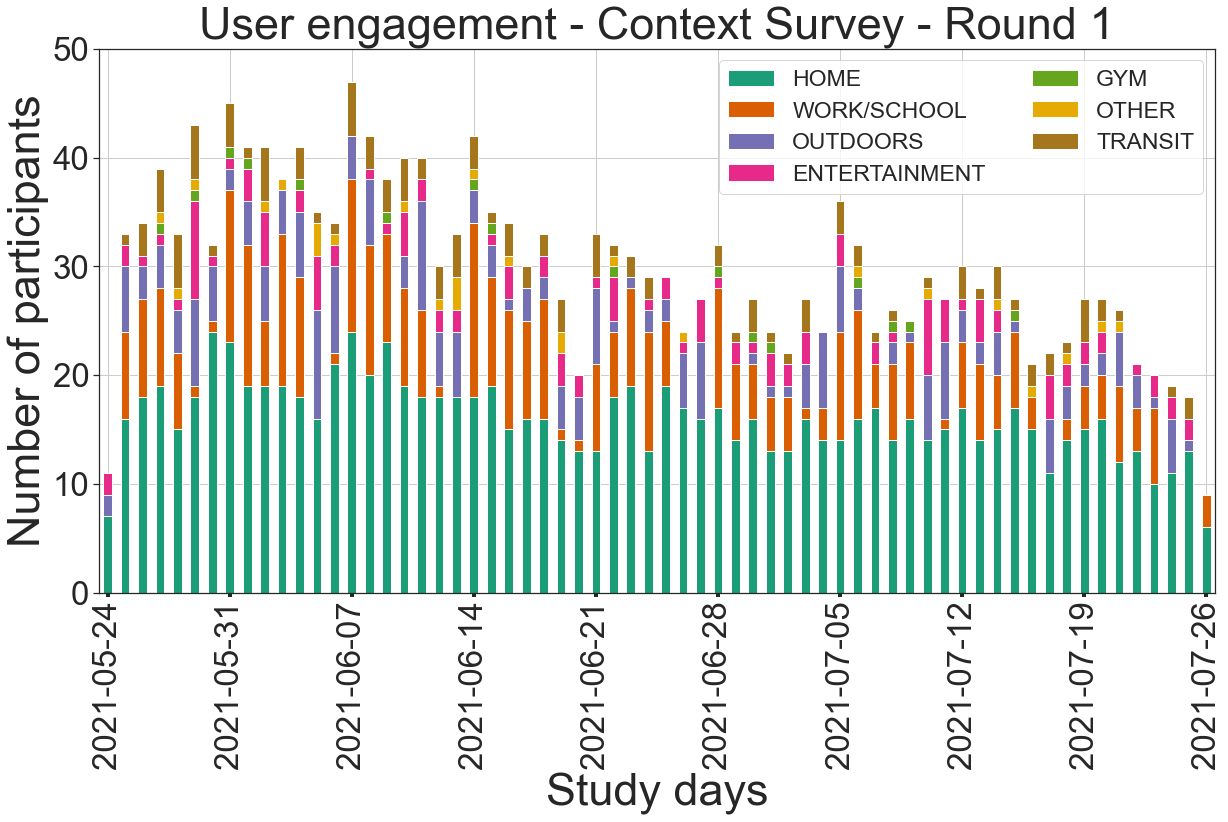

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))
df_sema_place_round1.reset_index().plot(x="Dates", y=["HOME","WORK/SCHOOL","OUTDOORS","ENTERTAINMENT","GYM",
                                                        "OTHER","TRANSIT"], kind="bar",ax=ax, stacked=True)
plt.xlabel('Study days', fontsize=45)
plt.ylabel('Number of participants', fontsize=45)
plt.title('User engagement - Context Survey - Round 1', fontsize=45)
#plt.xlim(0,64)
plt.legend(loc='best', ncol=2, fontsize=23)
plt.grid()
plt.ylim(0, 50)
plt.xticks(rotation=90)
plt.yticks( rotation=0)
plt.locator_params(axis='x', nbins=10)
plt.show()

In [32]:
#df_sema_place.reset_index(inplace=True)
df_sema_place_round2 = (df_sema_place['date'] >= "2021-11-15") & (df_sema_place['date'] <= "2022-01-17")
df_sema_place_round2=df_sema_place.loc[df_sema_place_round2]
df_sema_place_round2

,date,ENTERTAINMENT,GYM,HOME_OFFICE,OTHER,OUTDOORS,HOME,WORK/SCHOOL,TRANSIT,Dates,Time,DayName,DayDate
93,2021-11-15,0.0,0.0,1.0,0.0,0.0,10.0,2.0,0.0,2021-11-15,00:00:00,Monday,"Monday,2021-11-15"
94,2021-11-16,1.0,0.0,3.0,0.0,1.0,11.0,9.0,1.0,2021-11-16,00:00:00,Tuesday,"Tuesday,2021-11-16"
95,2021-11-17,0.0,0.0,9.0,1.0,0.0,12.0,7.0,0.0,2021-11-17,00:00:00,Wednesday,"Wednesday,2021-11-17"
96,2021-11-18,2.0,0.0,5.0,2.0,5.0,12.0,7.0,1.0,2021-11-18,00:00:00,Thursday,"Thursday,2021-11-18"
97,2021-11-19,0.0,0.0,3.0,1.0,3.0,10.0,8.0,0.0,2021-11-19,00:00:00,Friday,"Friday,2021-11-19"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2022-01-13,0.0,0.0,8.0,0.0,0.0,9.0,5.0,1.0,2022-01-13,00:00:00,Thursday,"Thursday,2022-01-13"
153,2022-01-14,1.0,0.0,7.0,0.0,0.0,11.0,3.0,1.0,2022-01-14,00:00:00,Friday,"Friday,2022-01-14"
154,2022-01-15,0.0,0.0,1.0,0.0,2.0,11.0,0.0,0.0,2022-01-15,00:00:00,Saturday,"Saturday,2022-01-15"
155,2022-01-16,2.0,0.0,2.0,0.0,1.0,10.0,0.0,1.0,2022-01-16,00:00:00,Sunday,"Sunday,2022-01-16"


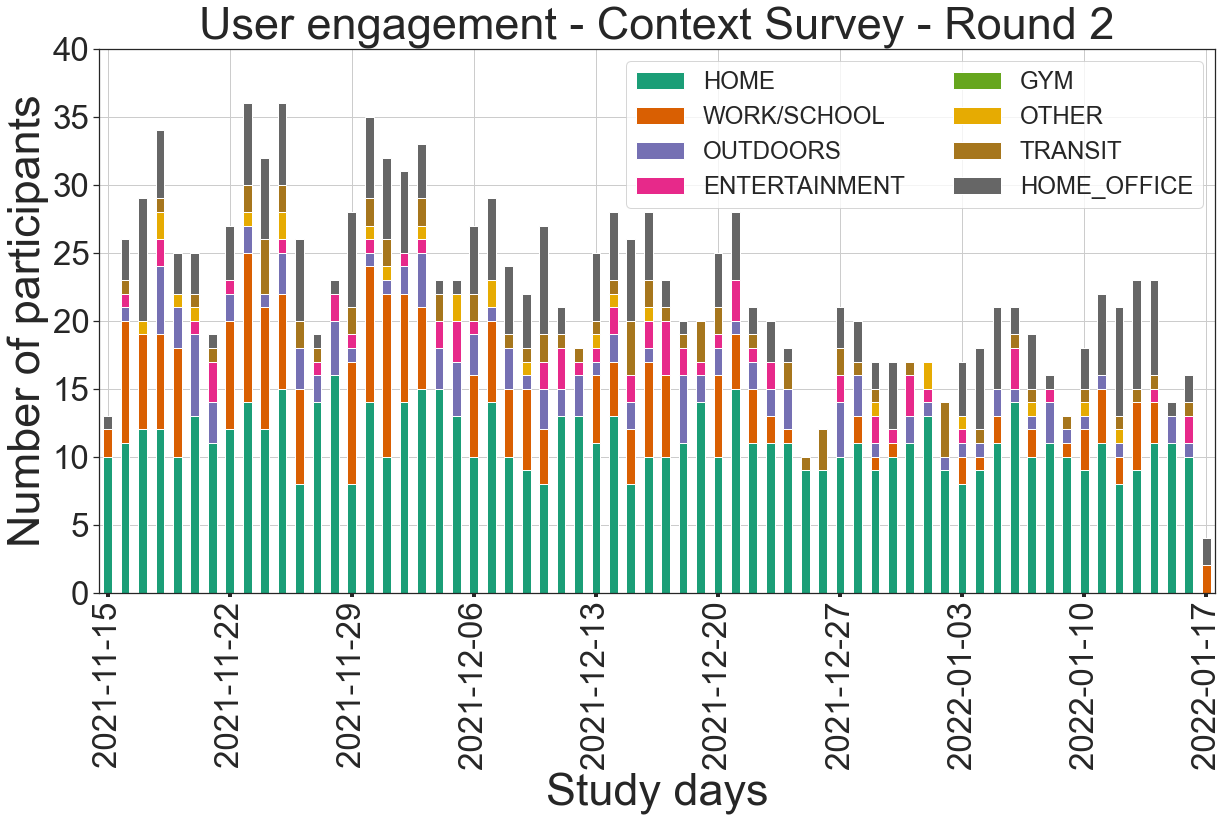

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))
df_sema_place_round2.reset_index().plot(x="Dates", y=["HOME","WORK/SCHOOL","OUTDOORS","ENTERTAINMENT","GYM",
                                                        "OTHER","TRANSIT","HOME_OFFICE"], kind="bar",ax=ax, stacked=True)
plt.xlabel('Study days', fontsize=45)
plt.ylabel('Number of participants', fontsize=45)
plt.title('User engagement - Context Survey - Round 2', fontsize=45)
#plt.xlim(0,64)
plt.legend(loc='best', ncol=2, fontsize=24)
plt.grid()
plt.ylim(0, 40)
plt.locator_params(axis='x', nbins=10)
plt.xticks(rotation=90)
plt.yticks( rotation=0)
plt.show()

Weekly basis

In [34]:
df_sema_mood = pd.concat([users, dates,df['RESTED/RELAXED'],df['TIRED'], df['TENSE/ANXIOUS'], df['NEUTRAL'],df['ALERT'],df['HAPPY'],
                          df['SAD']],axis=1)
df_sema_mood = df_sema_mood.dropna()
df_sema_mood = df_sema_mood.sort_values(by='date', ascending=True)
df_sema_mood=df_sema_mood.resample('W', on='date').sum()
df_sema_mood.reset_index(inplace=True)
#df_sema_mood

In [35]:
# Splitting timestamp column into two separate date and time columns
df_sema_mood['Dates'] = pd.to_datetime(df_sema_mood['date']).dt.date
df_sema_mood['Time'] = pd.to_datetime(df_sema_mood['date']).dt.time

In [36]:
#df_sema_mood.reset_index(inplace=True)
df_sema_mood_round1 = (df_sema_mood['date'] >= "2021-05-24") & (df_sema_mood['date'] <= "2021-07-26")
df_sema_mood_round1=df_sema_mood.loc[df_sema_mood_round1]
df_sema_mood_round1['exp_week'] = range(1, len(df_sema_mood_round1) + 1)
df_sema_mood_round1 = df_sema_mood_round1[['exp_week','RESTED/RELAXED','TIRED', 'TENSE/ANXIOUS','NEUTRAL', 'ALERT', 'HAPPY', 'SAD' ]]
#df_sema_mood_round1

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_37408/1683089856.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



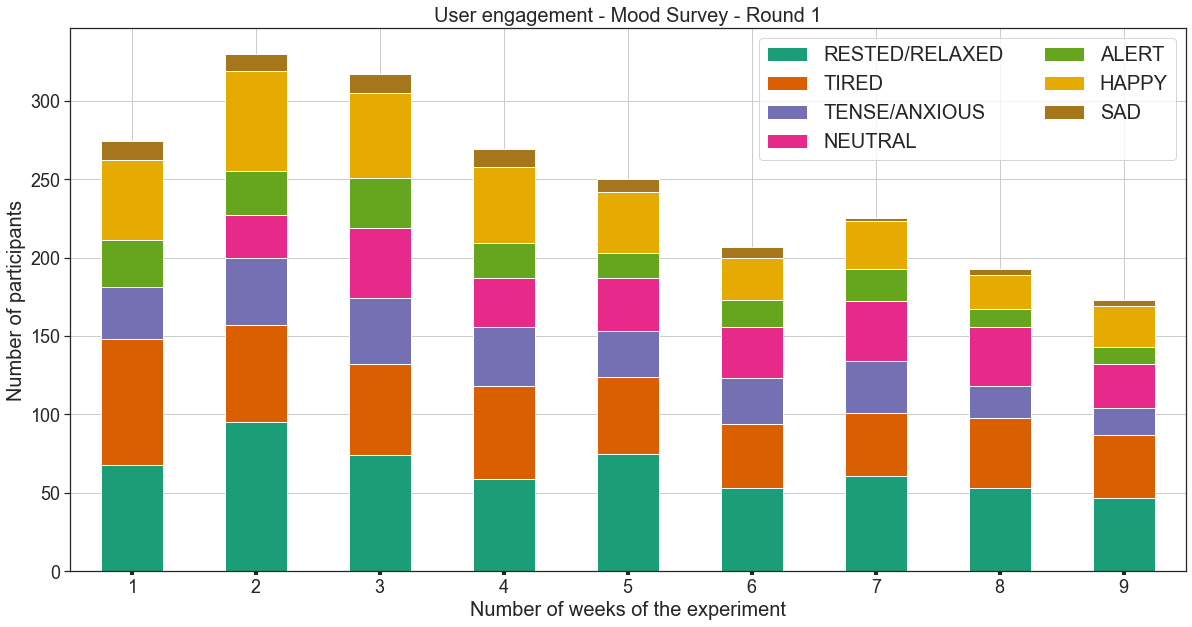

In [37]:
fig, ax = plt.subplots(figsize=(20, 10))
df_sema_mood_round1.reset_index().plot(x="exp_week", y=['RESTED/RELAXED','TIRED', 'TENSE/ANXIOUS','NEUTRAL', 'ALERT', 'HAPPY', 'SAD' ], kind="bar",ax=ax, stacked=True)
plt.xlabel('Number of weeks of the experiment',fontsize=20)
plt.ylabel('Number of participants',fontsize=20)
plt.title('User engagement - Mood Survey - Round 1',fontsize=20)
#plt.xlim(0,64)
plt.legend(loc='best',fontsize=20, ncol=2)
plt.grid()
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
plt.show()

In [38]:
#df_sema_mood.reset_index(inplace=True)
df_sema_mood_round2 = (df_sema_mood['date'] >= "2021-11-15") & (df_sema_mood['date'] <= "2022-01-17")
df_sema_mood_round2=df_sema_mood.loc[df_sema_mood_round2]
df_sema_mood_round2['exp_week'] = range(1, len(df_sema_mood_round2) + 1)
df_sema_mood_round2 = df_sema_mood_round2[['exp_week','RESTED/RELAXED','TIRED', 'TENSE/ANXIOUS','NEUTRAL', 'ALERT', 'HAPPY', 'SAD' ]]
#df_sema_mood_round2

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_37408/3672025569.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



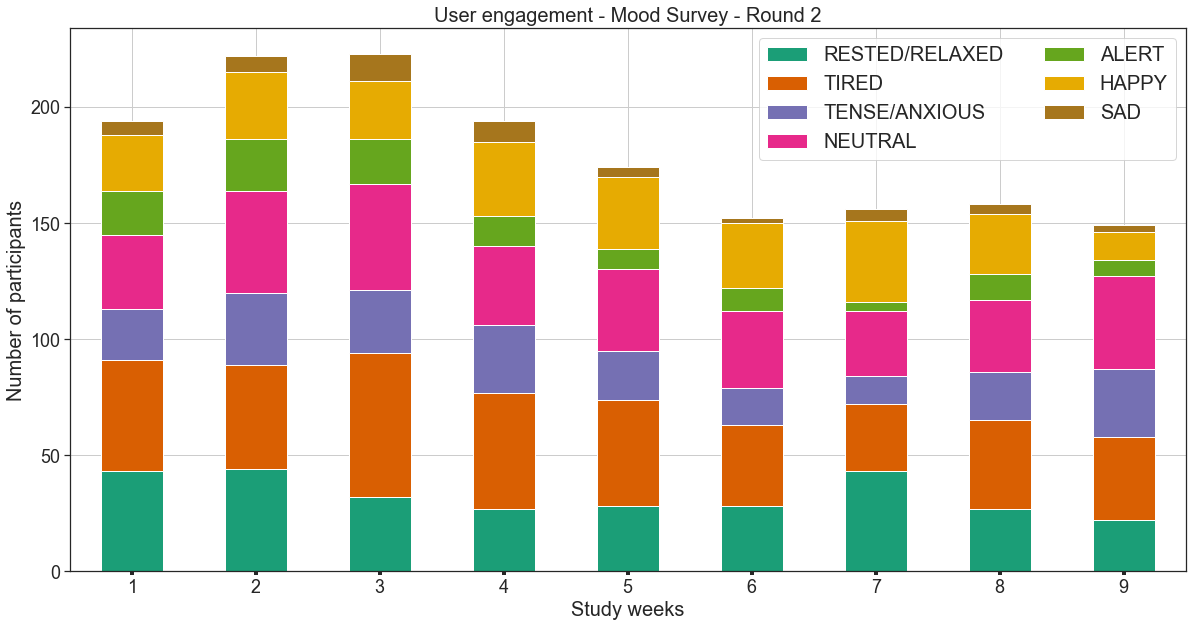

In [39]:
#sns.set_palette(palette='Dark2')
fig, ax = plt.subplots(figsize=(20, 10))
df_sema_mood_round2.reset_index().plot(x="exp_week", y=['RESTED/RELAXED','TIRED', 'TENSE/ANXIOUS','NEUTRAL', 'ALERT', 'HAPPY', 'SAD' ], kind="bar",ax=ax, stacked=True)
plt.xlabel('Study weeks',fontsize=20)
plt.ylabel('Number of participants',fontsize=20)
plt.title('User engagement - Mood Survey - Round 2',fontsize=20)
#plt.xlim(0,64)
plt.legend(loc='best',fontsize=20, ncol=2)
plt.grid()
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
plt.show()